In [12]:
import numpy as np
import  matplotlib.pyplot as plt

In [24]:
# assume some unit gaussian 10-D input data
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10
nonlinearities = ['relu']*len(hidden_layer_sizes)

In [34]:
act = {'relu': lambda x: np.maximum(0, x), 'tanh': lambda x: np.tanh(x)}
Hs = {}
for i in xrange(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    #W = np.random.randn(fan_in, fan_out) * 0.01  # layer initialization
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2)
    
    H = np.dot(X, W) # matrix multiply
    H = act[nonlinearities[i]](H) # nonlinearity
    Hs[i] = H # cache result on this layer

input layer had mean -0.001161 and std 0.997764
hidden layer 1 had mean 0.566792 and std 0.828982
hidden layer 2 had mean 0.562431 and std 0.829958
hidden layer 3 had mean 0.554726 and std 0.815257
hidden layer 4 had mean 0.548084 and std 0.782252
hidden layer 5 had mean 0.597749 and std 0.854064
hidden layer 6 had mean 0.532544 and std 0.817364
hidden layer 7 had mean 0.508534 and std 0.823674
hidden layer 8 had mean 0.509459 and std 0.753482
hidden layer 9 had mean 0.532022 and std 0.778778
hidden layer 10 had mean 0.497540 and std 0.750503


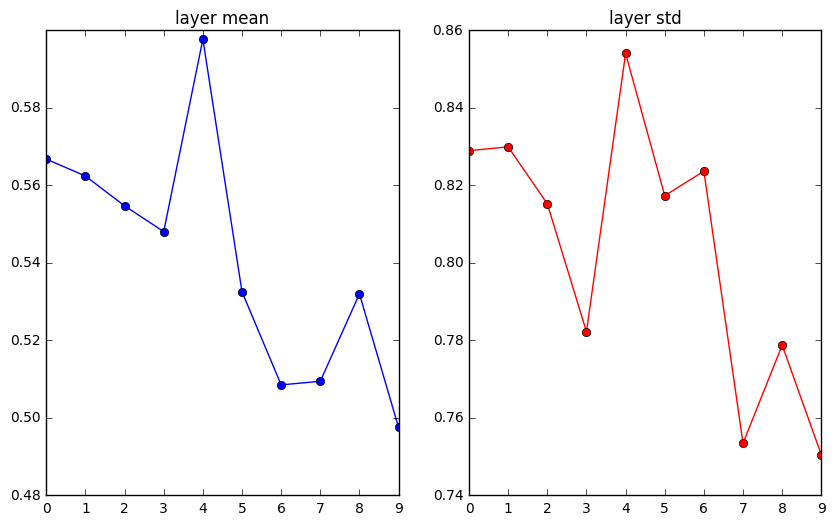

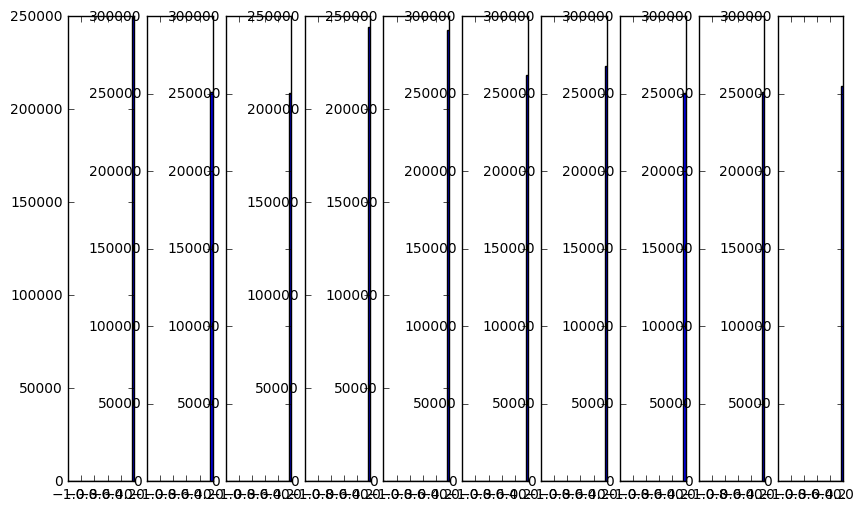

In [35]:
# look at distributions at each layer
print "input layer had mean %f and std %f" % (np.mean(D), np.std(D))
layer_means = [np.mean(H) for i,H in Hs.iteritems()]
layer_stds = [np.std(H) for i,H in Hs.iteritems()]
for i,H in Hs.iteritems():
    print "hidden layer %d had mean %f and std %f" % (i+1, layer_means[i], layer_stds[i])

# plot the means and standard deviations
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')


# plt the raw distributions
plt.figure(figsize=(10,6))
for i,H in Hs.iteritems():
    plt.subplot(1,len(Hs),i+1)
    plt.hist(H.ravel(), 30, range(-1,1))
plt.show()